<a href="https://colab.research.google.com/github/francokrepel/Twitter-Sentiment-Analysis-Model/blob/main/Object_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json
import os

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Getting data ready to work with:

Concat all the metadata files

In [ ]:
dir_path = 'drive/MyDrive/CIS4930/Object_Classification_Files/metadata'
metadata_list = []

for file in os.listdir(dir_path):
    if file.endswith('.json'):
        with open(os.path.join(dir_path, file), 'r') as f:
              data = pd.read_json(f, lines = True)
              metadata_list.append(data)


In [ ]:
metadata_df = pd.concat(metadata_list, ignore_index = True)
metadata_df.head()

,brand,bullet_point,color,fabric_type,item_id,item_name,model_name,model_number,product_type,style,...,item_keywords,material,spin_id,3dmodel_id,color_code,model_year,pattern,product_description,finish_type,item_shape
0,"[{'language_tag': 'de_DE', 'value': 'Amazon Es...","[{'language_tag': 'de_DE', 'value': 'Fällt gro...","[{'language_tag': 'de_DE', 'value': 'Mehrfarbi...","[{'language_tag': 'en_GB', 'value': '100% Cott...",B07HL25ZQM,"[{'language_tag': 'en_GB', 'value': 'Amazon Es...","[{'language_tag': 'en_GB', 'value': '6-Pack Bi...",[{'value': 'P_AE3131_M6'}],[{'value': 'BABY_PRODUCT'}],"[{'language_tag': 'de_DE', 'value': '6-Pack Bi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'language_tag': 'en_GB', 'value': 'AmazonBas...","[{'language_tag': 'en_GB', 'value': 'Large dry...",NaN,NaN,B0825D4F6R,"[{'language_tag': 'en_GB', 'value': 'AmazonBas...",NaN,[{'value': 'AMAZ2001'}],[{'value': 'HOME'}],"[{'language_tag': 'en_GB', 'value': 'Deluxe'}]",...,"[{'language_tag': 'en_GB', 'value': 'tower lau...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': '3D Printe...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,B07TF1FCFD,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Samsung G...",[{'value': 'gz8587-SL40668'}],[{'value': 'CELLULAR_PHONE_CASE'}],NaN,...,"[{'language_tag': 'en_IN', 'value': 'mobile co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,B08569SRJD,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Nokia 7.2'}]",[{'value': 'UV10845-SL40357'}],[{'value': 'CELLULAR_PHONE_CASE'}],NaN,...,"[{'language_tag': 'en_IN', 'value': 'Back Cove...","[{'language_tag': 'en_IN', 'value': 'Silicon'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'language_tag': 'en_US', 'value': 'Stone & B...","[{'language_tag': 'en_US', 'value': 'With mode...","[{'language_tag': 'en_US', 'value': 'Dark Grey'}]",NaN,B07B4G5RBN,"[{'language_tag': 'zh_CN', 'value': 'Stone & B...",NaN,[{'value': 'UPH10095B'}],[{'value': 'CHAIR'}],NaN,...,"[{'language_tag': 'en_US', 'value': 'living-ro...","[{'language_tag': 'zh_CN', 'value': '灰石色'}, {'...",485925ed,B07B4G5RBN,[#918F8C],NaN,NaN,NaN,NaN,NaN


In [ ]:
metadata_df.columns

Index(['brand', 'bullet_point', 'color', 'fabric_type', 'item_id', 'item_name',
       'model_name', 'model_number', 'product_type', 'style', 'main_image_id',
       'country', 'marketplace', 'domain_name', 'node', 'item_dimensions',
       'item_weight', 'other_image_id', 'item_keywords', 'material', 'spin_id',
       '3dmodel_id', 'color_code', 'model_year', 'pattern',
       'product_description', 'finish_type', 'item_shape'],
      dtype='object')

In [ ]:
metadata_df.size

4135656

In [ ]:
metadata_df.isna().sum()

brand                      59
bullet_point            16132
color                   31522
fabric_type            139509
item_id                     0
item_name                   0
model_name              66123
model_number            23611
product_type                0
style                  104514
main_image_id             575
country                     0
marketplace                 0
domain_name                 0
node                     6953
item_dimensions        104364
item_weight             41508
other_image_id           9726
item_keywords           20926
material                94117
spin_id                139480
3dmodel_id             139742
color_code             129459
model_year             139937
pattern                143112
product_description    143462
finish_type            146166
item_shape             142636
dtype: int64

In [ ]:
metadata_df['item_name'][10][0]['value']

"Klepe Men's Grey Flyknit with Memory Foam Running Shoes-7 UK (41 EU) (8 US) (BX020/GRY)"

Extract relevant columns

In [ ]:
relevant_columns = ['item_name', 'main_image_id', 'product_type', 'bullet_point']
relevant_columns_df = metadata_df[relevant_columns]
relevant_columns_df.isna().sum()

item_name            0
main_image_id      575
product_type         0
bullet_point     16132
dtype: int64

In [ ]:
relevant_columns_df = relevant_columns_df.dropna()
relevant_columns_df.head(5)

,item_name,main_image_id,product_type,bullet_point
0,"[{'language_tag': 'en_GB', 'value': 'Amazon Es...",718mYsQTQbL,[{'value': 'BABY_PRODUCT'}],"[{'language_tag': 'de_DE', 'value': 'Fällt gro..."
1,"[{'language_tag': 'en_GB', 'value': 'AmazonBas...",81lg2wto16L,[{'value': 'HOME'}],"[{'language_tag': 'en_GB', 'value': 'Large dry..."
2,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",71R4R6x-tjL,[{'value': 'CELLULAR_PHONE_CASE'}],"[{'language_tag': 'en_IN', 'value': '3D Printe..."
3,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...",71QSAxIJagL,[{'value': 'CELLULAR_PHONE_CASE'}],"[{'language_tag': 'en_IN', 'value': 'Snug fit ..."
4,"[{'language_tag': 'zh_CN', 'value': 'Stone & B...",91UiRD6UcHL,[{'value': 'CHAIR'}],"[{'language_tag': 'en_US', 'value': 'With mode..."


Cleaning up Dataframe so it can be worked on:

In [ ]:
# Function to parse JSON strings in each cell
def parse_json(cell):
    try:
        return json.loads(cell)
    except (TypeError, json.JSONDecodeError):
        return cell

# Remove item names that dont start with en (non-english)
def filter_en_language(row, columns):
    for col in columns:
        item = row[col]
        if not any([entry['language_tag'].startswith('en_') for entry in item]):
            return False
    return True

# Extract value from list
def extract_value_field(cell):
    if isinstance(cell, list):
        for item in cell:
            if 'value' in item:
                return item['value']
    return cell

In [ ]:
# Applying parsing of JSON to string list
filtered_df = relevant_columns_df.apply(parse_json)
# Filtering out cells that are not in english
columns_to_filter = ['item_name', 'bullet_point']
filtered_df = filtered_df[filtered_df.apply(lambda row: filter_en_language(row, columns_to_filter), axis=1)]
# Extracting the value list item from each cell
filtered_df = filtered_df.applymap(extract_value_field)
filtered_df.head(10)

,item_name,main_image_id,product_type,bullet_point
1,AmazonBasics 3-Tier Deluxe Tower Laundry Dryin...,81lg2wto16L,HOME,"Large drying capacity, 42 metres"
2,Amazon Brand - Solimo Designer Number Eight 3D...,71R4R6x-tjL,CELLULAR_PHONE_CASE,3D Printed Hard Back Case Mobile Cover for Sam...
3,Amazon Brand - Solimo Designer Dark Night View...,71QSAxIJagL,CELLULAR_PHONE_CASE,"Snug fit for Nokia 7.2, with perfect cut-outs ..."
4,"Stone & Beam Varon 过渡日床, 灰石色",91UiRD6UcHL,CHAIR,With modern low-slung arms and luxuriously sof...
5,Whole Paws Grain Free Beef Dinner With Vegetab...,81n2w4Ne0yL,GROCERY,Brought to you by Whole Foods Market.
6,AmazonBasics UV Protection Filter (52mm - 88mm),61D2NEA+aoL,CAMERA_OTHER_ACCESSORIES,"UV protection filter for general, everyday use"
7,"AmazonBasics Primary Composition 1/2"" Ruled, 1...",71Eh+9AyVCL,PAPER_PRODUCT,15-pack of 100-sheet primary compositions; 1/2...
8,Amazon Brand - Solimo Designer Number One 3D P...,61HO6woRflL,CELLULAR_PHONE_CASE,3D Printed Hard Back Case Mobile Cover for Sam...
10,Klepe Men's Grey Flyknit with Memory Foam Runn...,912MoK+QXuL,SHOES,Outer Material: COTTON
11,Amazon Brand - 206 Collective Women's Sabor Fl...,61jhx-zcfIL,SANDAL,Modern slide designed for daily wear and super...


# Preliminary Data Analysis

In [ ]:
filtered_df['product_type'].value_counts()

CELLULAR_PHONE_CASE      64723
SHOES                     8534
GROCERY                   5783
HOME                      2046
CHAIR                     1432
                         ...  
BLANKET                      1
THICKENING_AGENT             1
AGRICULTURAL_SUPPLIES        1
BAKING_CUP                   1
AIR_MATTRESS                 1
Name: product_type, Length: 508, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-16-e9c26bcc4ad7>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=filtered_df['product_type'].head(100), palette='bright')


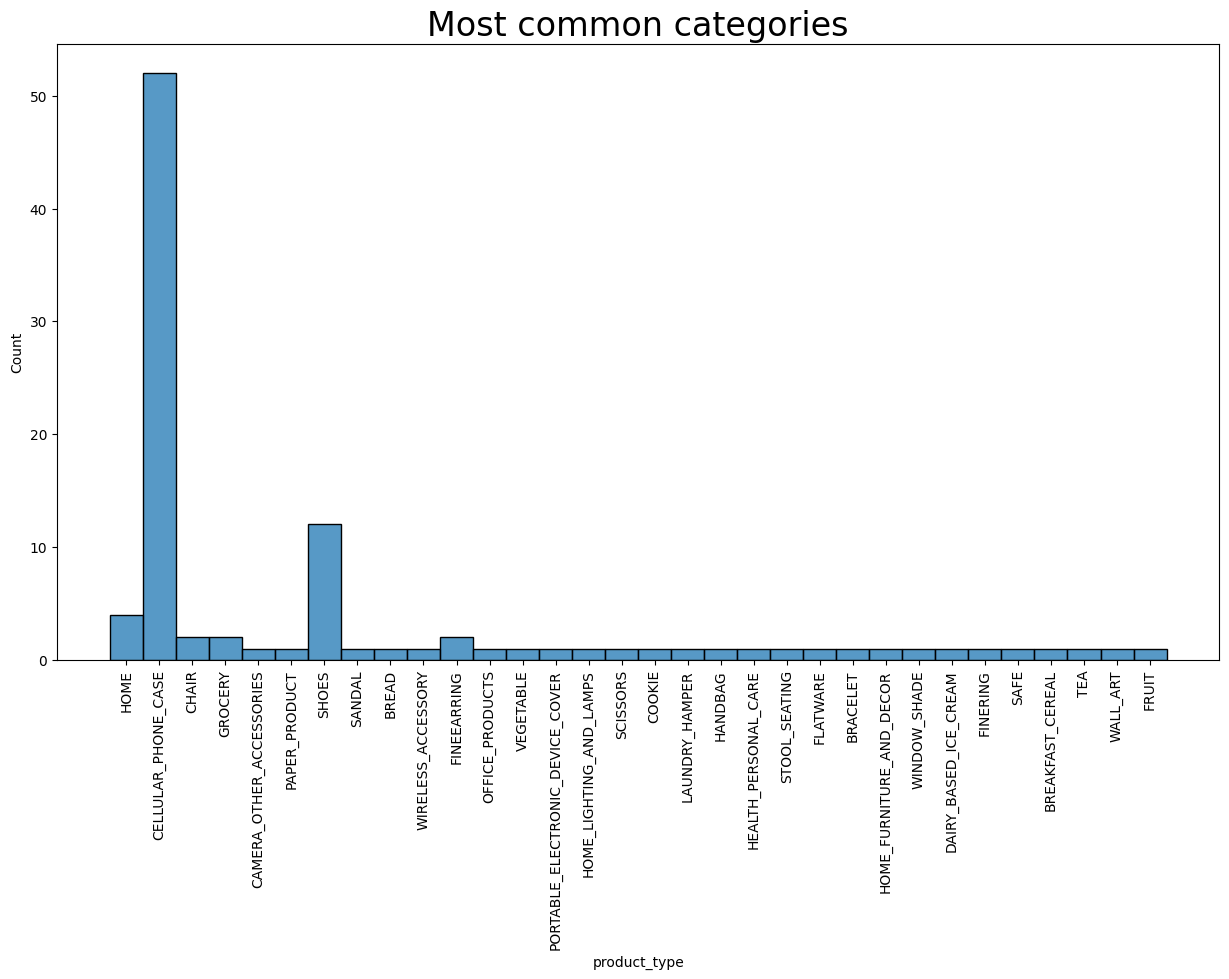

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=filtered_df['product_type'].head(100), palette='bright')
plt.title("Most common categories", fontsize=24)
plt.xticks(rotation='vertical')
plt.show()

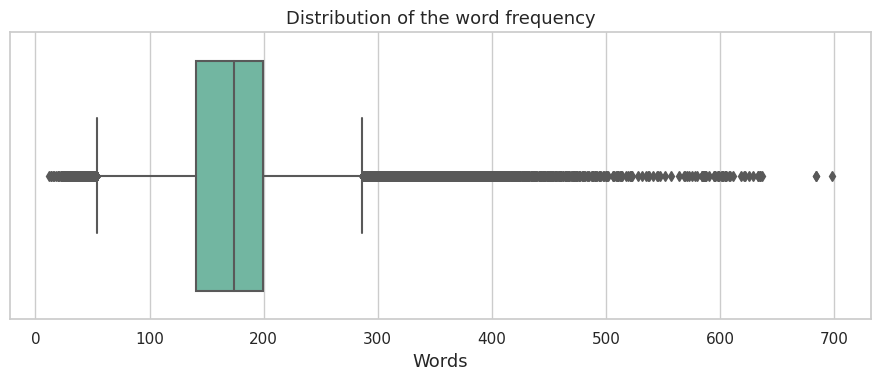

In [ ]:
# Combine the bullet point and product name into one cell
filtered_df['text'] = filtered_df['item_name'] + " " + filtered_df['bullet_point']

boxplot = filtered_df.copy()
boxplot['len'] = filtered_df.text.apply(lambda x: len(x)) # length of descriptions


sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})
plt.figure(figsize=(9, 4))

ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set2")
plt.ylabel('')
plt.xlabel('Words')
plt.title("Distribution of the word frequency", fontsize=13)
plt.tight_layout(h_pad=3)


Looks like most of the words range from 50 to 300 words, but there is a good amount of outliers up to almost 700 words

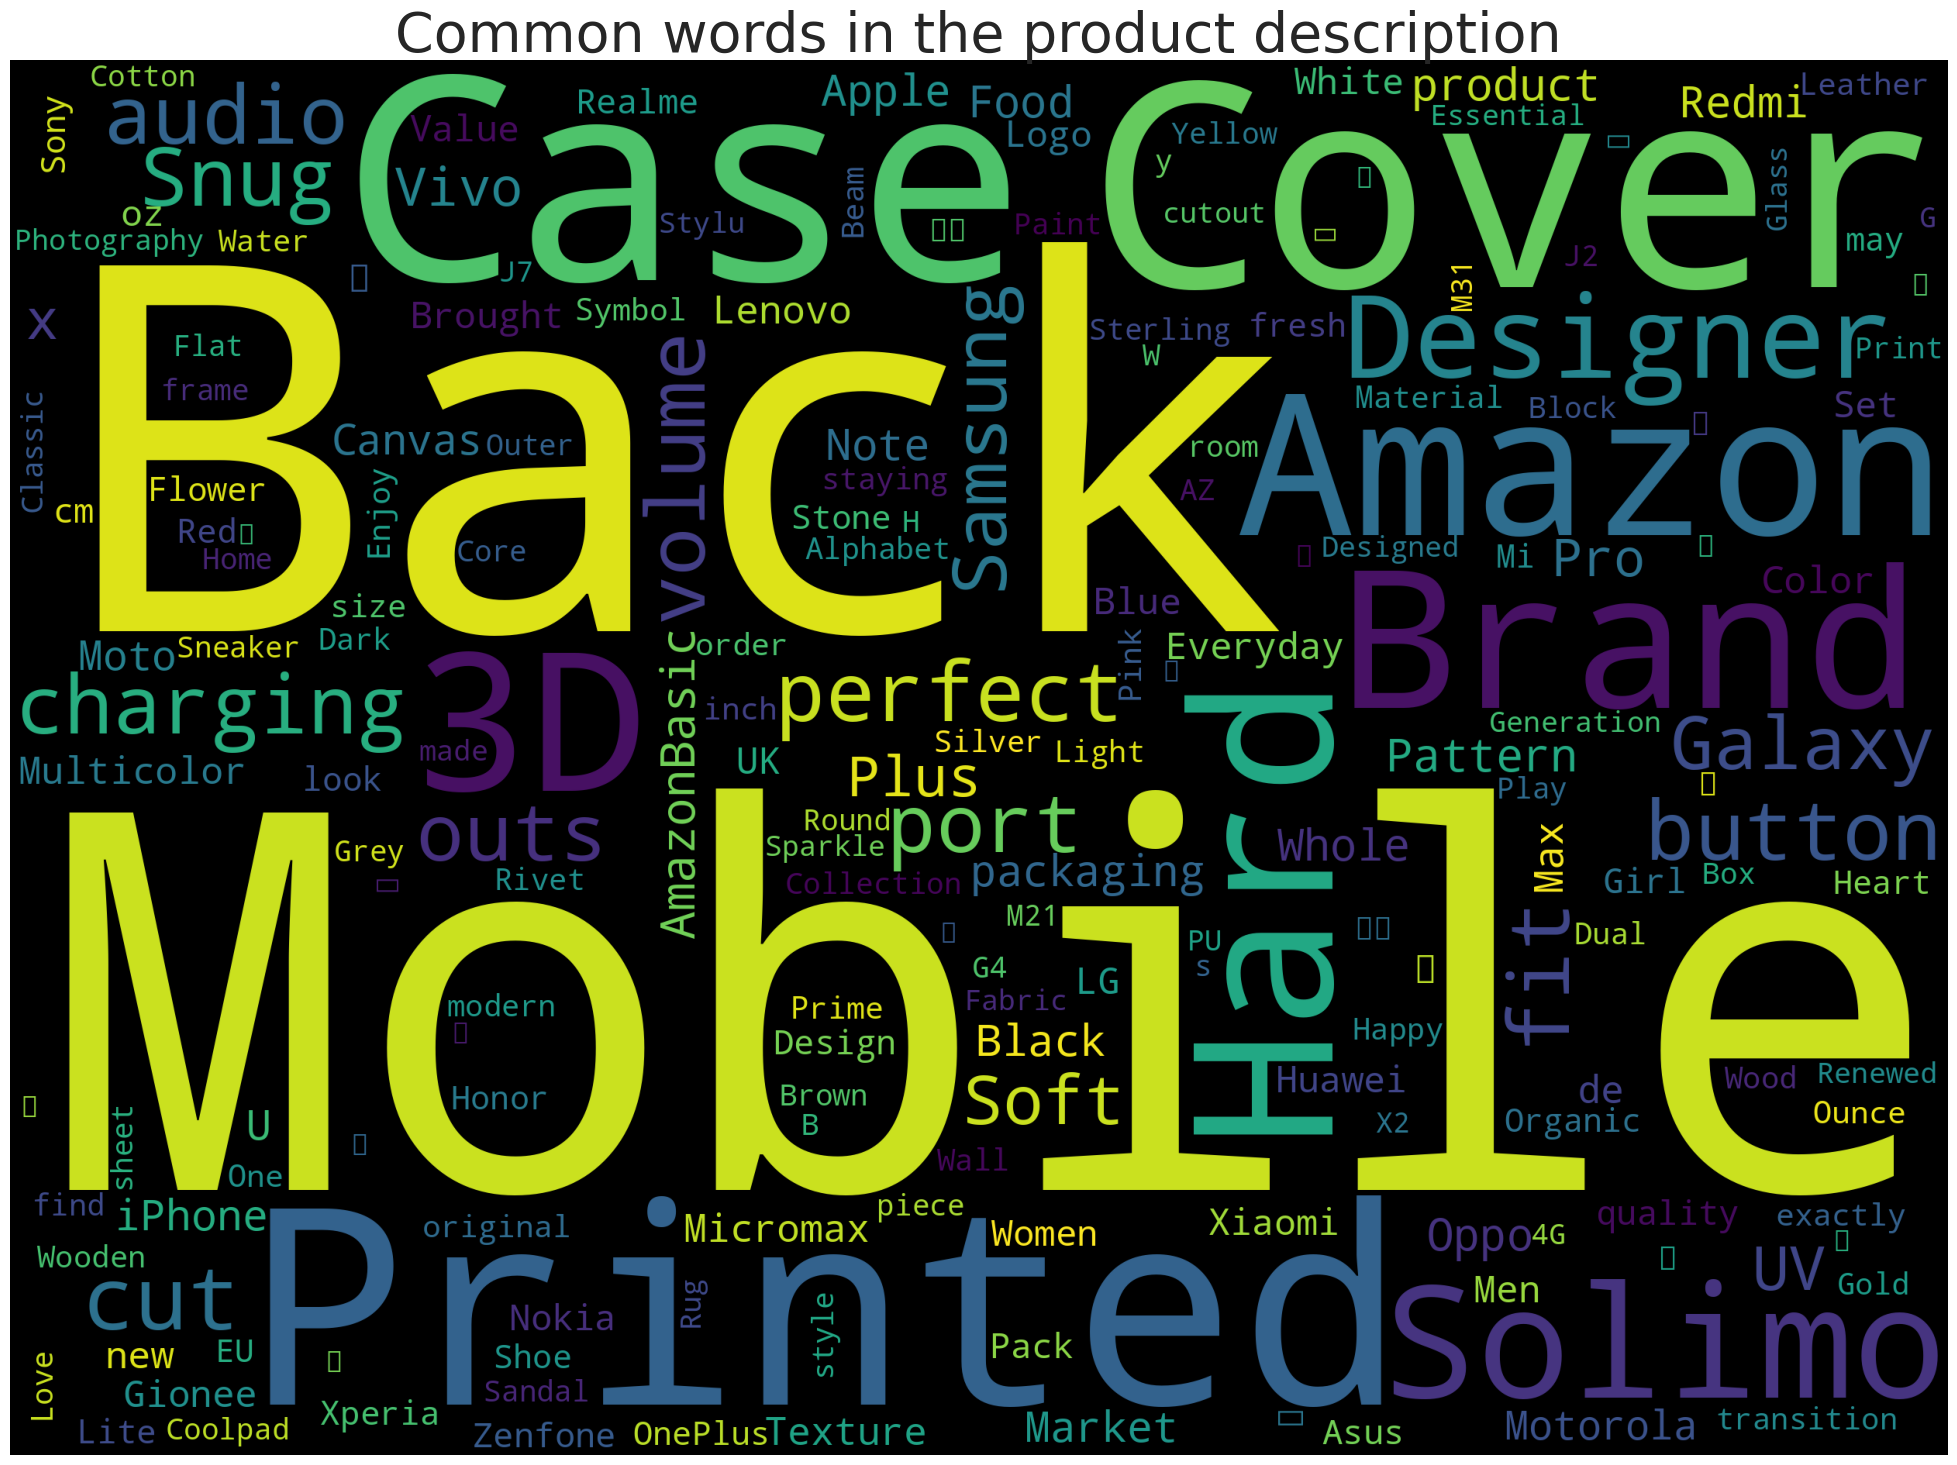

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(25,25))
text = filtered_df.text.values
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  collocations=False,
                  width=2500,
                  height=1800
                  ).generate(" ".join(text))
plt.axis('off')
plt.title("Common words in the product description",fontsize=40)
plt.imshow(cloud)

# Text Preprocessing

In [ ]:
import spacy
import re

nlp = spacy.load('en_core_web_sm')

def preprocess_spacy(text):
    # Tokenize
    doc = nlp(text)

    # Lowercase, remove stopwords, lemmatize, remove punctuation, and remove extra whitespace
    tokens = [
        token.lemma_.lower().strip() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    # Remove special characters, numbers, and non-English characters
    tokens = [re.sub(r"[^a-zA-Z]+", "", token) for token in tokens if token.isalpha()]

    # Remove empty tokens that may result from the previous step
    tokens = [token for token in tokens if token]

    return ' '.join(tokens)

# Example usage
sample_text = "This is a sample 过渡日床, 灰石色 text to don't demonstrate SpaCy preprocessing.!!!!? "
preprocessed_text = preprocess_spacy(sample_text)
print(preprocessed_text)


sample text demonstrate spacy preprocessing


Apply the preprocessing on DF

In [ ]:
# Apply the preprocessing function
filtered_df['preprocessed_text'] = filtered_df['text'].apply(preprocess_spacy)

In [ ]:
filtered_df['preprocessed_text']

1         amazonbasics tier deluxe tower laundry drying ...
2         amazon brand solimo designer number printed ha...
3         amazon brand solimo designer dark night view u...
4         stone beam varon modern low slung arm luxuriou...
5         paws grain free beef dinner vegetables oz brin...
                                ...                        
147695    amazon brand solimo designer daddy girl glitte...
147696    amazon brand solimo designer pink lady pattern...
147698    amazon brand solimo designer abstract printed ...
147699    everyday value organic quinoa oz bring foods m...
147701    amazon brand find man espadrilles elastic stra...
Name: preprocessed_text, Length: 113198, dtype: object

I think removing amazon might be good, as it doesnt really have anything to do with the products themselves

In [ ]:
from collections import Counter
Counter(" ".join(filtered_df['preprocessed_text']).split()).most_common(10)

[('mobile', 106620),
 ('cover', 100497),
 ('case', 99345),
 ('printed', 98402),
 ('amazon', 83007),
 ('hard', 80922),
 ('brand', 78548),
 ('solimo', 69052),
 ('designer', 63666),
 ('cut', 33846)]

In [ ]:
# remove instances of amazon
filtered_df['preprocessed_text'] = filtered_df['preprocessed_text'].str.replace('amazon', '')
filtered_df.to_csv('filtered_df', index=False)

Only use top 10 categories, as counts go very low after that

In [ ]:
# Sort the DataFrame by the number of unique cells in the 'product_type' column
sorted_df = filtered_df.groupby('product_type').size().sort_values(ascending=False).reset_index(name='counts')

# Slice the top 10 rows
top_10_df = sorted_df.head(10)

# Merge the top 10 rows with the original DataFrame on the 'product_type' column
sliced_final_df = pd.merge(top_10_df, filtered_df, on='product_type', how='inner')
sliced_final_df.to_csv('sliced_final_df.csv', index = False)


cp: cannot stat 'data.csv': No such file or directory


# Combining modalities with feature Extraction



Use this text to load if not first time:

In [ ]:
sliced_final_df = pd.read_csv("drive/MyDrive/CIS4930/Object_Classification_Files/sliced_final_df.csv") # TEXTUAL DESCRIPTION MODALITY
image_features = pd.read_csv("drive/MyDrive/CIS4930/Object_Classification_Files/image_features.csv") # IMAGE MODALITY

In [ ]:
sliced_final_df['product_type'].value_counts()

CELLULAR_PHONE_CASE           64723
SHOES                          8534
GROCERY                        5783
HOME                           2046
CHAIR                          1432
HEALTH_PERSONAL_CARE           1118
HOME_FURNITURE_AND_DECOR       1072
FINENECKLACEBRACELETANKLET      902
SOFA                            846
HOME_BED_AND_BATH               843
Name: product_type, dtype: int64

Load image feature files to merge with the NLP features

In [ ]:
# IGNORE IF LOADING CSV FROM FILES:

# Load the image features
image_features_dir  = 'drive/MyDrive/CIS4930/Object_Classification_Files/image_features'
feature_files = [os.path.join(image_features_dir, file) for file in os.listdir(image_features_dir) if file.endswith('_vgg16_feature_vectors.csv')]

image_features_list = []

for file in feature_files:
    data = pd.read_csv(file)
    image_features_list.append(data)

image_features = pd.concat(image_features_list, ignore_index = True)
image_features.to_csv('image_features', index = False)

Use images metadata to map the image path to its respective image_id

In [ ]:
image_metadata = pd.read_csv("drive/MyDrive/CIS4930/Object_Classification_Files/images.csv")

# Remove the first 3 characters from the 'path' column
image_metadata['path'] = image_metadata['path'].str[3:]

# Merge image_features with image_metadata based on the 'Image' column in image_features and the 'path' column in image_metadata
merged_image_features = pd.merge(image_features, image_metadata, left_on='Image', right_on='path')

# Replace the 'Image' column in merged_image_features with the 'image_id' column from image_metadata
merged_image_features = merged_image_features.drop(columns=['Image', 'path']).rename(columns={'image_id': 'main_image_id'})

# Now merged_image_features has the 'Image' column replaced with the respective image_id

Merge onto existing df to make one df with image feature vectors and preprocessed text + other columns

In [ ]:
# Merge the image_features DataFrame with the original DataFrame
merged_df = merged_image_features.merge(sliced_final_df, on='main_image_id')

create the TF-IDF features for the text column in the merged_df DataFrame.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(merged_df['text'])


# RAM DOESNT SUFFICE, MUST REDUCE DIMENSIONALITY
from sklearn.decomposition import TruncatedSVD

# Number of components to keep (you can adjust this value based on your available memory)
n_components = 100

# Apply TruncatedSVD
svd = TruncatedSVD(n_components=n_components)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

# convert back to df
tfidf_df = pd.DataFrame(tfidf_reduced, columns=[f'svd_{i}' for i in range(n_components)])

Combine the image features and the textual features (TF-IDF) in a single DataFrame.

In [ ]:
# Extract image features from merged_df
image_features_df = merged_df.iloc[:, :512]

# Concatenate image_features_df and tfidf_df
combined_features_df = pd.concat([image_features_df, tfidf_df], axis=1)

# Train / Testing multimodal model

Prepare train test

In [ ]:
X = combined_features_df
y = merged_df['product_type']

Split train test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit/test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Visualizing results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

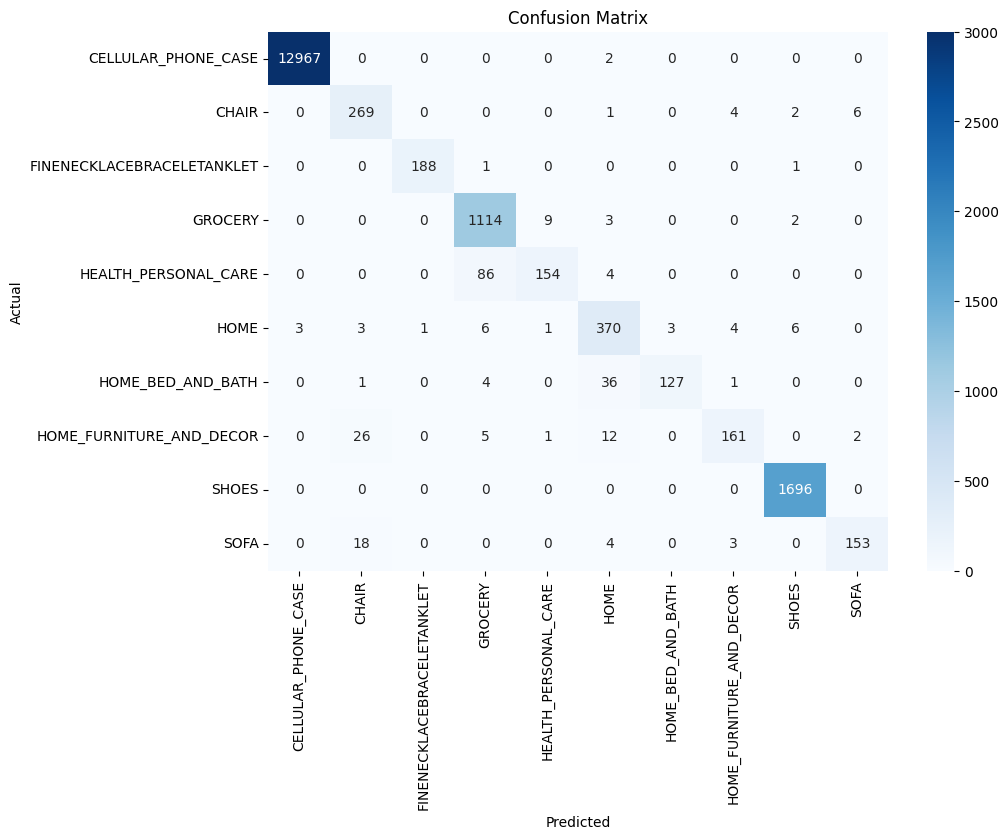

Accuracy: 0.9850515463917526

Classification Report:
                             precision    recall  f1-score   support

       CELLULAR_PHONE_CASE       1.00      1.00      1.00     12969
                     CHAIR       0.85      0.95      0.90       282
FINENECKLACEBRACELETANKLET       0.99      0.99      0.99       190
                   GROCERY       0.92      0.99      0.95      1128
      HEALTH_PERSONAL_CARE       0.93      0.63      0.75       244
                      HOME       0.86      0.93      0.89       397
         HOME_BED_AND_BATH       0.98      0.75      0.85       169
  HOME_FURNITURE_AND_DECOR       0.93      0.78      0.85       207
                     SHOES       0.99      1.00      1.00      1696
                      SOFA       0.95      0.86      0.90       178

                  accuracy                           0.99     17460
                 macro avg       0.94      0.89      0.91     17460
              weighted avg       0.99      0.99      0.98   

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', vmax=3000, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test)) #so many phone cases so i had to drop blue sensitivity
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ROC curves & AUC

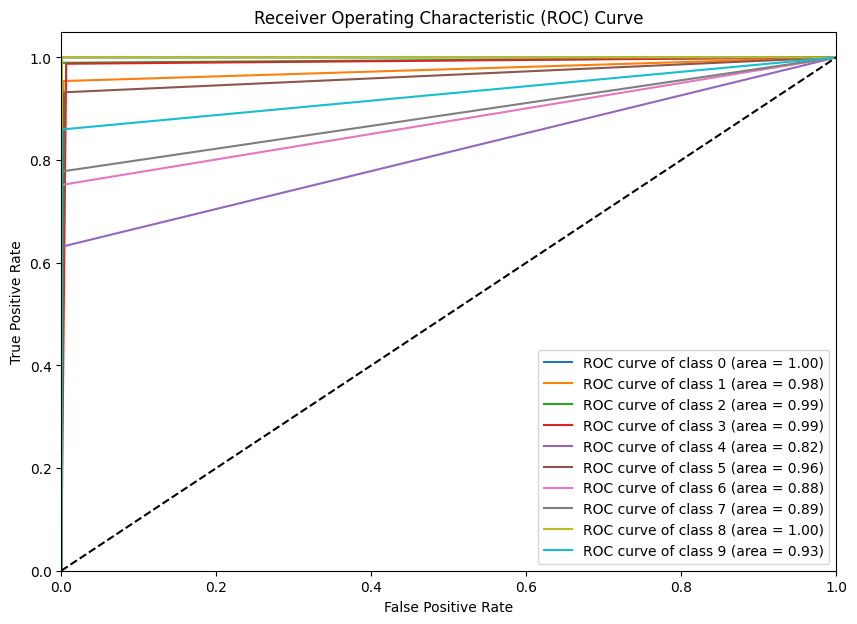

In [ ]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Evaluating model using only Tf-IDF NLP Feature

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, accuracy_score

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(sliced_final_df['preprocessed_text'], sliced_final_df['product_type'], test_size=0.2, random_state=42)

# # Create a pipeline with TfidfVectorizer and a classifier (e.g., MultinomialNB)
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('classifier', MultinomialNB())
# ])

# # Train the model on the training data
# pipeline.fit(X_train, y_train)

# # Predict the labels for the testing data
# y_pred = pipeline.predict(X_test)

# # Evaluate the model
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))